In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Project
## Fatigue And Depression Predictive Analysis

In [6]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\me_cfs_vs_depression_dataset.csv")

# Data Info

In [7]:
df.shape

(1000, 16)

In [8]:
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


# Data Cleaning & Handling

In [ ]:
# Handle missing values
df.dropna(subset=['fatigue_severity_scale_score'], inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))


In [12]:
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,5.454672,24.0,1.6,13.0,6.9,0,Partially working,Very low,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


# EDA, Visualization & Machine Learning

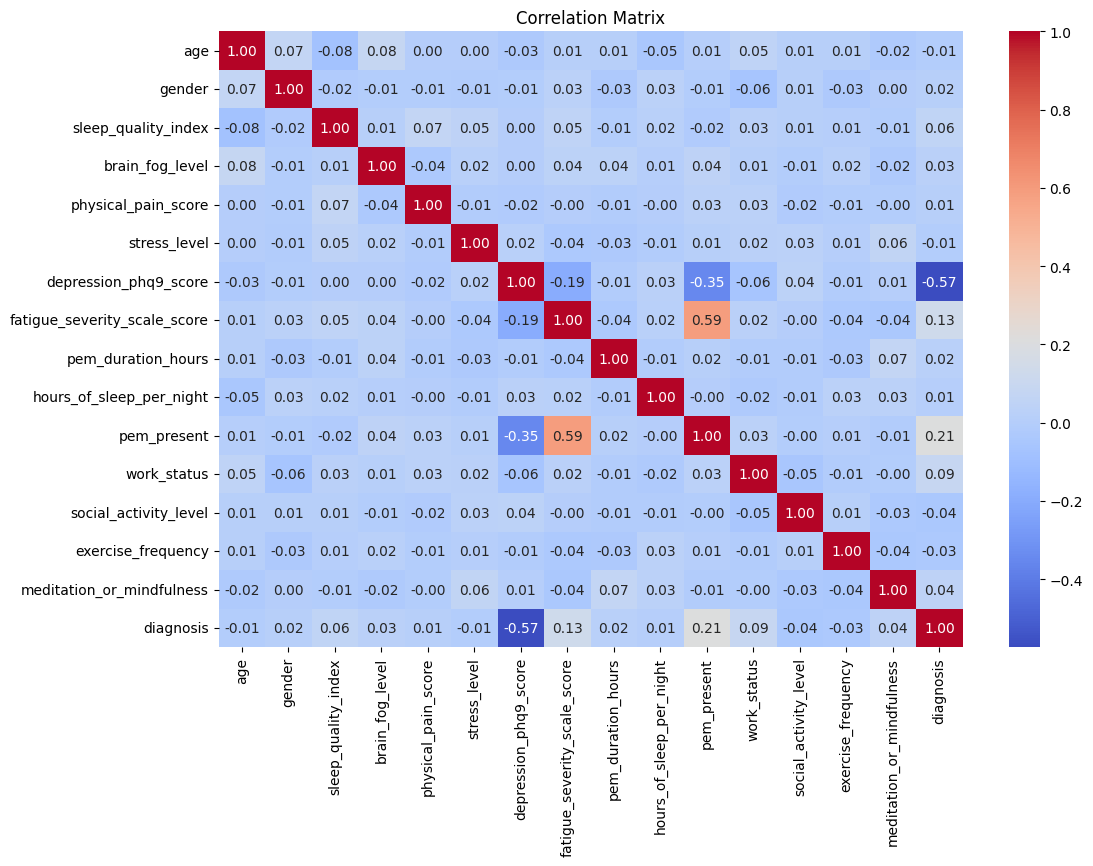

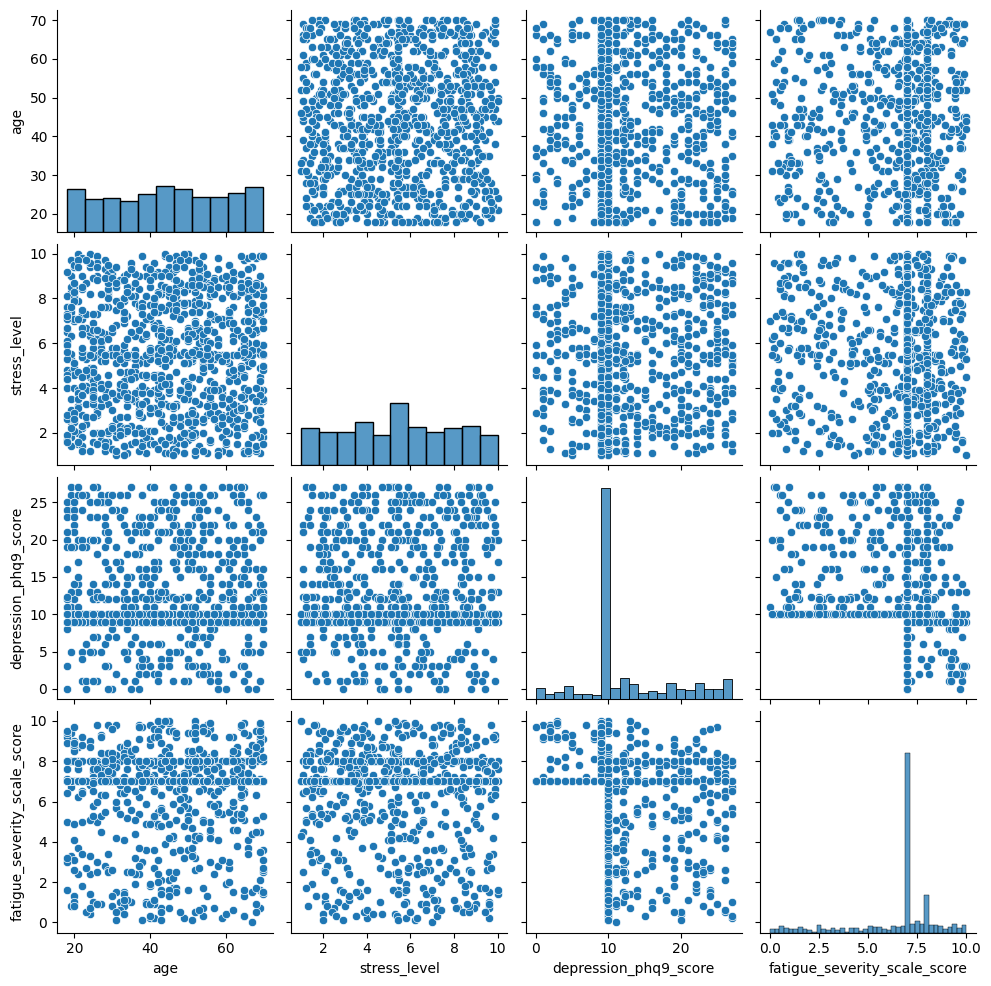

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
R2 Score: 0.34941615623433175
RMSE: 1.774070657317637


In [ ]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Histogram
fig = px.histogram(df, x='fatigue_severity_scale_score', color='diagnosis', barmode='overlay')
fig.show()

# Pairplot
sns.pairplot(df_encoded[['age', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score']])
plt.show()

# Features and Target
X = df_encoded.drop(columns=['fatigue_severity_scale_score'])
y = df_encoded['fatigue_severity_scale_score']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model with GridSearchCV
model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# Evaluation
y_pred = grid.predict(X_test_scaled)
print("Best Parameters:", grid.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))